In [1]:
%matplotlib notebook

%load_ext autoreload
%autoreload 2

In [2]:
import cytoflow as flow

In [3]:
tube1 = flow.Tube(file='../../cytoflow/tests/data/Plate01/RFP_Well_A3.fcs',
                  conditions = {"Dox" : 10.0})

tube2 = flow.Tube(file='../../cytoflow/tests/data/Plate01/CFP_Well_A4.fcs',
                  conditions = {"Dox" : 1.0})

import_op = flow.ImportOp(conditions = {"Dox" : "log"},
                          tubes = [tube1, tube2])

ex = import_op.apply()

In [4]:
logicle = flow.LogicleTransformOp()
logicle.name = "Logicle transformation"
logicle.channels = ['V2-A', 'Y2-A', 'B1-A']
logicle.estimate(ex)
ex2 = logicle.apply(ex)

<IPython.core.display.Javascript object>


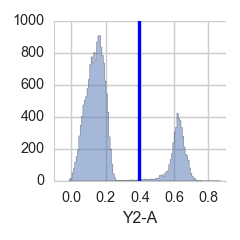

In [11]:
t = flow.ThresholdOp(name = "Threshold",
                     channel = "Y2-A")
tv = t.default_view()
tv.plot(ex2)
tv.interactive = True

In [12]:
t.threshold

0.39675637979548972

<IPython.core.display.Javascript object>


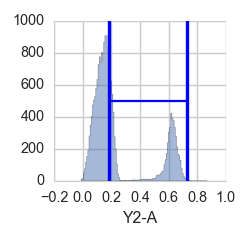

In [10]:
r = flow.RangeOp(name = "Range",
                 channel = "Y2-A")
rv = r.default_view()
rv.plot(ex2)
rv.interactive = True

In [6]:
print r.low, r.high

0.420110445268 0.659489616361


<IPython.core.display.Javascript object>


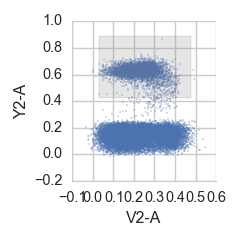

In [6]:
r2d = flow.Range2DOp(name = "Range2D",
                     xchannel = "V2-A",
                     ychannel = "Y2-A")
r2dv = r2d.default_view()
r2dv.plot(ex2)
r2dv.interactive = True

In [7]:
print r2d.xlow, r2d.xhigh, r2d.ylow, r2d.yhigh

0.0331559912508 0.479451659243 0.424524655244 0.890884872545


<IPython.core.display.Javascript object>


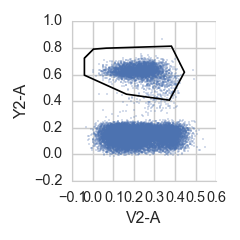

In [8]:
p = flow.PolygonOp(name = "Polygon",
                   xchannel = "V2-A",
                   ychannel = "Y2-A")
pv = p.default_view()
pv.interactive = True
pv.plot(ex2)

In [9]:
print p.vertices

[(0.067113270337190611, 0.79874111993313845), (0.38243086185364583, 0.81378499791057268), (0.44549438015693688, 0.61821458420392839), (0.37272878211467797, 0.40760029251984964), (0.16413406772686912, 0.45273192645215232), (-0.039609606791455809, 0.59564876723777704), (-0.039609606791455809, 0.72352173004596754), (-0.039609606791455809, 0.72352173004596754), (0.0040497520338995119, 0.79121918094442156)]
